In [13]:
# running script to load GROCERY DB tables 
%run main.py

Connected to GROCERY database.
All tables loaded from GROCERY DB.
Connection to GROCERY DB is now closed.


C:\Users\chanks\workspace\grocery-db\main.py:89: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  table = pd.read_sql(query, connection, parse_dates = ['date'], coerce_float= True)
C:\Users\chanks\workspace\grocery-db\main.py:89: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  table = pd.read_sql(query, connection, parse_dates = ['date'], coerce_float= True)
C:\Users\chanks\workspace\grocery-db\main.py:89: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  table = pd.read_sql(query, connection, parse_dates = ['date'], coerce_float= T

In [88]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime as dt 


In [3]:
# tables of interest for analysis: 

stores, items, trips = grocery_tables['store'], grocery_tables['items'], grocery_tables['trips']

In [14]:
named_trips = grocery_tables['trips_store_name']

In [4]:
stores.head()

,id,name,address
0,1,Fred Meyer,3805 SE Hawthorne Blvd
1,2,Winco,7979 SE Powell Blvd
2,3,US FOODS CHEFSTORE,731 SE Stephens St
3,4,Trader Joes,4121 NE Halsey St
4,5,Whole Foods,2825 E Burnside St


In [6]:
#joining stores with trips to get named
named_trips = pd.merge(stores, trips, left_on = 'id', right_on = 'store_id', how = 'right')

In [7]:
named_trips

,id_x,name,address,id_y,store_id,date,total_cost
0,1,Fred Meyer,3805 SE Hawthorne Blvd,1,1,2023-09-07,18.65
1,2,Winco,7979 SE Powell Blvd,2,2,2023-09-11,51.75
2,3,US FOODS CHEFSTORE,731 SE Stephens St,3,3,2023-09-12,35.36
3,4,Trader Joes,4121 NE Halsey St,4,4,2023-09-17,57.56
4,2,Winco,7979 SE Powell Blvd,5,2,2023-09-19,77.13
5,5,Whole Foods,2825 E Burnside St,6,5,2023-09-22,22.45
6,2,Winco,7979 SE Powell Blvd,7,2,2023-09-27,79.44
7,6,Target,3031 SE Powell Blvd,8,6,2023-10-02,44.97
8,2,Winco,7979 SE Powell Blvd,9,2,2023-10-07,70.15
9,1,Fred Meyer,3805 SE Hawthorne Blvd,10,1,2023-10-13,15.47


In [8]:
#getting trip count per store: 
trip_count = named_trips.groupby('name').size().reset_index(name = 'count')

trip_count_sorted = trip_count.sort_values(by = 'count', ascending = False)

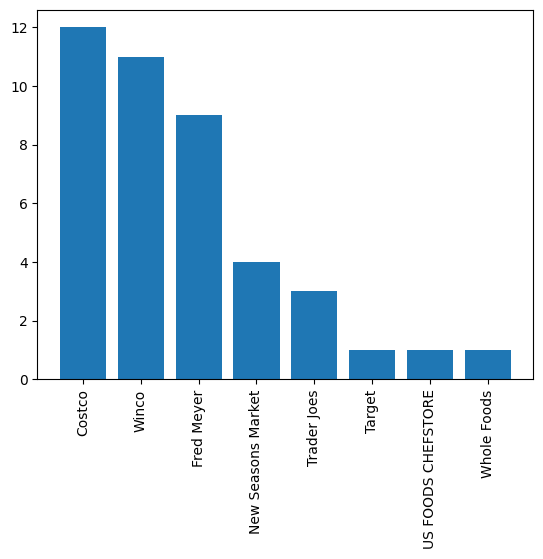

In [34]:
plt.bar(trip_count_sorted['name'], trip_count_sorted['count'])

plt.xticks(rotation = 90)

plt.show()



Text(0.5, 1.0, 'Grocery Frequency, September 2023 - February 2024')

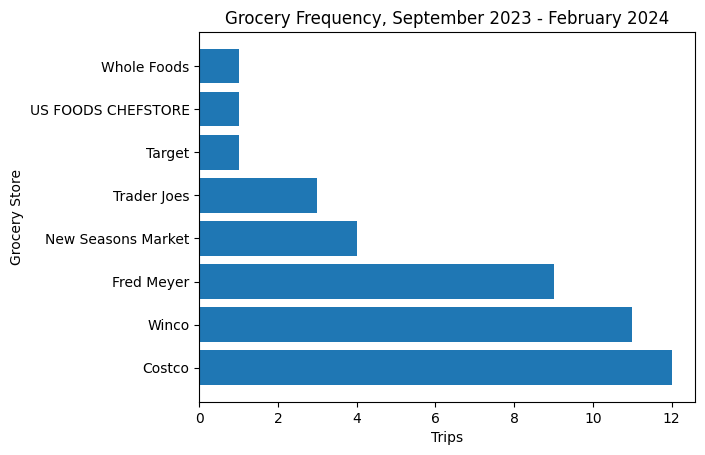

In [9]:
#next step is to visualize this summary table: 

plt.barh(trip_count_sorted['name'],trip_count_sorted['count'])

plt.xlabel('Trips')
plt.ylabel('Grocery Store')
plt.title('Grocery Frequency, September 2023 - February 2024')


(array([9., 7., 4., 6., 4., 3., 4., 2., 2., 1.]),
 array([  5.69 ,  15.771,  25.852,  35.933,  46.014,  56.095,  66.176,
         76.257,  86.338,  96.419, 106.5  ]),
 <BarContainer object of 10 artists>)

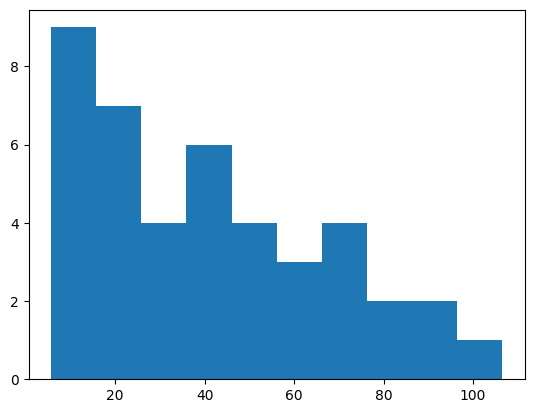

In [27]:
plt.hist(trips['total_cost'])
# most of the trips were 40 dollars and under

(array([114., 125.,  60.,  33.,  14.,  10.,   7.,   4.,   5.,   2.]),
 array([ 0.05 ,  2.243,  4.436,  6.629,  8.822, 11.015, 13.208, 15.401,
        17.594, 19.787, 21.98 ]),
 <BarContainer object of 10 artists>)

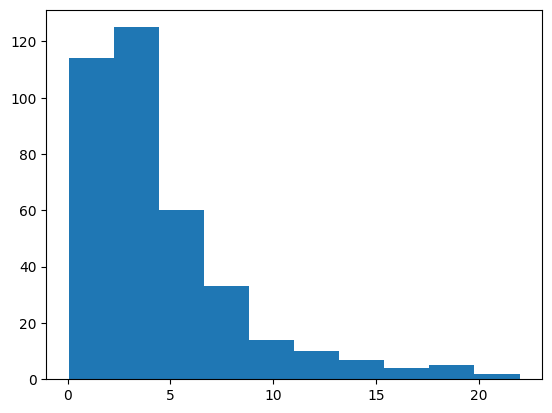

In [26]:
plt.hist(items['total_price'])
#it seems that the prices of products looks to be exponential decay....

## Time series plot for grocery store trips

In [16]:
# table to visualize: named_trips 

named_trips.head()

,id,date,total_cost,name
0,1,2023-09-07,18.65,Fred Meyer
1,2,2023-09-11,51.75,Winco
2,3,2023-09-12,35.36,US FOODS CHEFSTORE
3,4,2023-09-17,57.56,Trader Joes
4,5,2023-09-19,77.13,Winco


ok I want plot...

date on x-axis 
total_cost on y axis 

I want to map color to name

In [19]:
# set date column as dataframe inddex using set_index method: 
named_trips = named_trips.set_index('date')

KeyError: "None of ['date'] are in the columns"

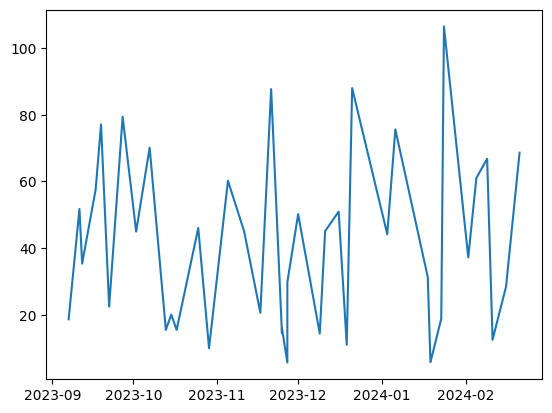

In [21]:
plt.plot(named_trips.index, named_trips['total_cost'])

interesting! There appears to be a fairly consistent pattern of peaks and valleys

let's create a scatter plot with the store name mapped to color: 

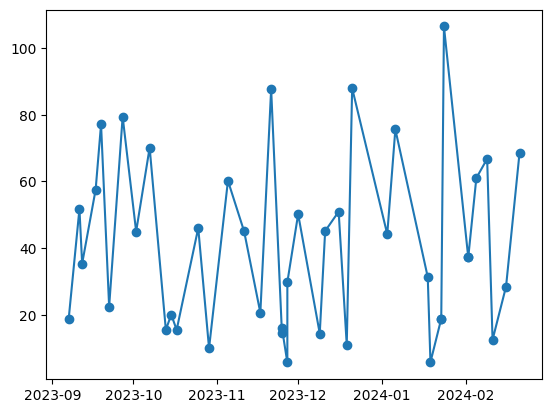

In [22]:
plt.plot(named_trips.index, named_trips['total_cost'], marker = 'o')

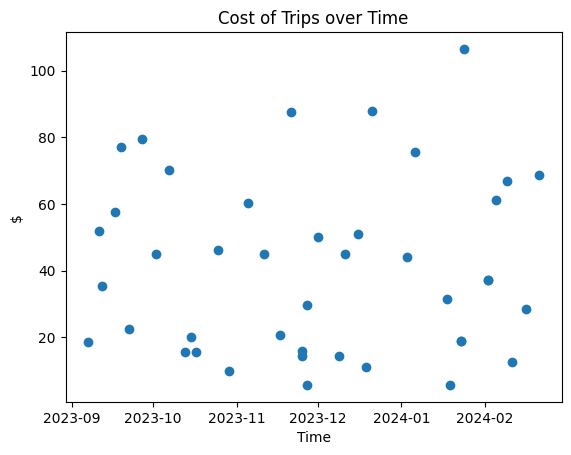

In [29]:
plt.scatter(named_trips.index, named_trips['total_cost'])

plt.title('Cost of Trips over Time')

plt.ylabel('$')

plt.xlabel('Time')

plt.show()
# looks pretty noisy....

matplotlib with seaborn

In [37]:
import seaborn as sns

In [45]:
sns.set_theme() # i dunno   

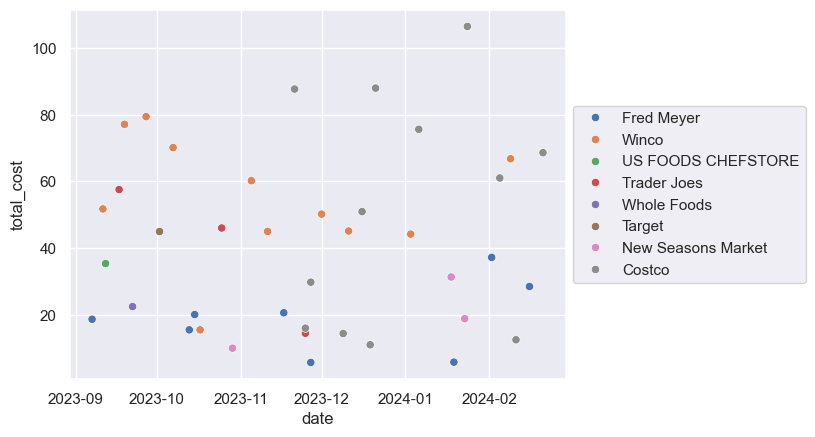

In [61]:
sns.scatterplot(data = named_trips, x = 'date', y = 'total_cost', hue = 'name')

plt.legend(bbox_to_anchor = (1,.5), loc = 'center left')


let's look only at the 3 most frequented grocery stores: fred meyer, winco, and costco. It looks like there are 3 tiers of money spent, which correpond to one of these stores. 

In [63]:
# filter named_trips data set to only include fm, winco, costco

In [64]:
named_trips

,id,total_cost,name
date,,,
2023-09-07,1,18.65,Fred Meyer
2023-09-11,2,51.75,Winco
2023-09-12,3,35.36,US FOODS CHEFSTORE
2023-09-17,4,57.56,Trader Joes
2023-09-19,5,77.13,Winco
2023-09-22,6,22.45,Whole Foods
2023-09-27,7,79.44,Winco
2023-10-02,8,44.97,Target
2023-10-07,9,70.15,Winco


In [65]:
big_three = ['Fred Meyer', 'Winco', 'Costco']

In [68]:
# conditional filtering using 
trips_at_big3 = named_trips[named_trips['name'].isin(big_three)]

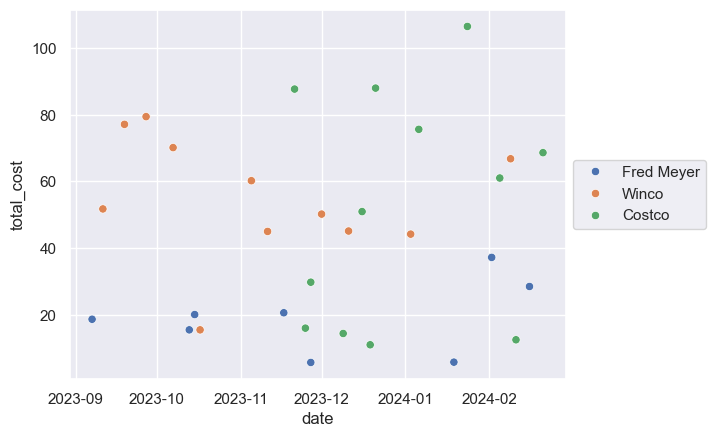

In [69]:
sns.scatterplot(data = trips_at_big3, x = 'date', y = 'total_cost', hue = 'name')

plt.legend(bbox_to_anchor = (1,.5), loc = 'center left')

In [86]:
# what is the average and median amount spent at these three stores? 

for i in big_three:
    subset = trips_at_big3[trips_at_big3['name'] == i]
    print(f'Average mount spent at {i} : ${round(subset['total_cost'].mean(),2)}')
    print(f'Median amount spent at {i} : ${round(subset['total_cost'].median(),2)}')
    print('\n')


Average mount spent at Fred Meyer : $21.02
Median amount spent at Fred Meyer : $20.06


Average mount spent at Winco : $55.04
Median amount spent at Winco : $51.75


Average mount spent at Costco : $51.84
Median amount spent at Costco : $55.99




How often do I go shopping ?
How many times per week ? per month ? 

In [98]:
trips.groupby(trips['date'].dt.month).count()

,id,store_id,date,total_cost
date,,,,
1,7,7,7,7
2,7,7,7,7
9,7,7,7,7
10,7,7,7,7
11,8,8,8,8
12,6,6,6,6


In [99]:
trips['date'].dt.to_period('M')

0     2023-09
1     2023-09
2     2023-09
3     2023-09
4     2023-09
5     2023-09
6     2023-09
7     2023-10
8     2023-10
9     2023-10
10    2023-10
11    2023-10
12    2023-10
13    2023-10
14    2023-11
15    2023-11
16    2023-11
17    2023-11
18    2023-11
19    2023-11
20    2023-11
21    2023-11
22    2023-12
23    2023-12
24    2023-12
25    2023-12
26    2023-12
27    2023-12
28    2024-01
29    2024-01
30    2024-01
31    2024-01
32    2024-01
33    2024-01
34    2024-01
35    2024-02
36    2024-02
37    2024-02
38    2024-02
39    2024-02
40    2024-02
41    2024-02
Name: date, dtype: period[M]

In [107]:
trips['date'].dt.month

trips['month'] = trips['date'].dt.strftime('%B')
trips['year'] = trips['date'].dt.year

trips.groupby(['year','month']).size().reset_index(name = 'count')

,year,month,count
0,2023,December,6
1,2023,November,8
2,2023,October,7
3,2023,September,7
4,2024,February,7
5,2024,January,7


In [108]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

trips['month'] = pd.Categorical(trips['month'], categories = month_order, ordered = True)


In [112]:
month_counts = trips.groupby(['year','month']).size().reset_index(name = 'count')

C:\Users\chanks\AppData\Local\Temp\ipykernel_14832\3353993958.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  month_counts = trips.groupby(['year','month']).size().reset_index(name = 'count')


In [113]:
month_counts = month_counts[month_counts['count'] != 0]

In [114]:
month_counts

,year,month,count
8,2023,September,7
9,2023,October,7
10,2023,November,8
11,2023,December,6
12,2024,January,7
13,2024,February,7


In [118]:
# what is average: 

print(f'I go to the grocery store on average {int(month_counts['count'].mean())} times a month') 

I go to the grocery store on average 7 times a month


In [122]:
# let's make a calendar! 
import calplot

trips.set_index('date', inplace = True)


findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.


(<Figure size 1250x340 with 3 Axes>,
 array([<Axes: ylabel='2023'>, <Axes: ylabel='2024'>], dtype=object))

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.


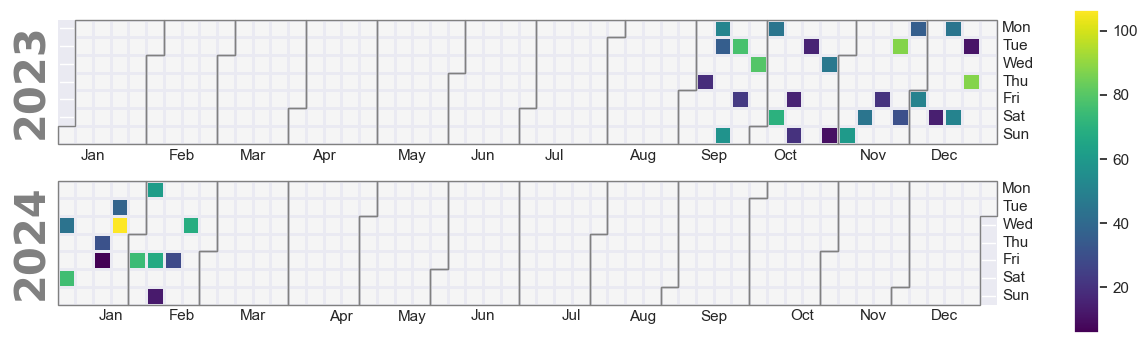

In [124]:
calplot.calplot(trips['total_cost'])

In [129]:
items

,trip_id,product_name,quantity_unit,quantity,price_per_unit,total_price,sku,weight_oz
0,1,APPLES COSMIC CRISP,LBS,2.79,2.50,6.92,84747300763,NaN
1,1,BANANAS,LBS,2.53,0.65,1.64,64312604011,NaN
2,1,KROGER SUPER,PC,1.00,2.50,2.50,1111002660,NaN
3,1,LACINATO KALE,PC,1.00,1.99,1.99,81490501036,NaN
4,1,NECTARINES ORGANIC,LBS,1.60,3.49,5.55,74183993035,NaN
...,...,...,...,...,...,...,...,...
369,44,JAPANESE GYOZA,PC,2.00,14.99,14.99,1763967,NaN
370,44,KIMCHI,PC,1.00,7.89,7.89,512688,42.0
371,44,KS COLUMBIAN COFFEE,PC,2.00,17.89,17.89,120296,48.0
372,44,KS PEACHES 4 JARS,PC,1.00,12.89,12.89,512688,96.0


In [177]:
# what is the most commonly purchased item ? 

item_counts = items.groupby(by = 'product_name').size().sort_values(ascending = False).reset_index(name = 'count')

#bananas, apples, cucumber, dates, egg 
print(pd.DataFrame(item_counts))

                            product_name  count
0                                BANANAS      9
1                 APPLE GOLDEN DELICIOUS      9
2                          EGGS ORG 1 DZ      6
3                               CUCUMBER      5
4                          DATES MEDJOOL      5
5                            LEMON LARGE      4
6                           CHOBANI FLIP      4
7                     BREAD DAVES KILLER      4
8                               ZUCCHINI      4
9                               KALE ORG      3
10                          ONION YELLOW      3
11                       CLIF BAR 6 PACK      3
12                               WALNUTS      3
13                           GREEN ONION      3
14                    WINCO CREAM CHEESE      2
15                           FRANZ BREAD      2
16                               SHALLOT      2
17                 CHOBANI YOGURT 4 PACK      2
18                                 RXBAR      2
19                    ROTISSERIE CHICKEN

In [141]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [151]:
# I see that there are 2 names for golden delicious apples. There is "APPLE GOLDEN DELICIOUS" AND "APPLES GOLDEN DELICIOUS"
#let's use the pd.contains() method to first filter the dataset for these apples: 

dem_apples = items[items['product_name'].str.contains("delicious", case = False)]
dem_apples


,trip_id,product_name,quantity_unit,quantity,price_per_unit,total_price,sku,weight_oz
69,7,APPLE GOLDEN DELICIOUS,LBS,1.77,1.48,2.62,4021,NaN
86,9,APPLE GOLDEN DELICIOUS,LBS,2.21,1.48,3.27,4021,NaN
118,12,APPLE GOLDEN DELICIOUS,LBS,2.39,1.48,3.53,4021,NaN
154,15,APPLE GOLDEN DELICIOUS,LB,2.38,1.28,3.05,4020,NaN
174,16,APPLES GOLDEN DELICIOUS,LB,1.68,1.28,2.15,4020,NaN
217,25,APPLE GOLDEN DELICIOUS,LBS,1.50,1.28,1.92,4021,NaN
242,27,APPLE GOLDEN DELICIOUS,LBS,1.87,1.28,2.39,4021,NaN
277,31,APPLE GOLDEN DELICIOUS,LBS,2.03,1.28,2.60,4020,32.0
345,41,APPLES GOLDEN DELICIOUS,LBS,2.23,1.38,3.08,4021,32.0


In [153]:
# I wll use the str.replace() method, similar to my beloved gsub() in R. 

items['product_name'] = items['product_name'].str.replace('APPLES GOLDEN DELICIOUS', 'APPLE GOLDEN DELICIOUS')

In [155]:
items[items['product_name'].str.contains("apple", case = False)]

,trip_id,product_name,quantity_unit,quantity,price_per_unit,total_price,sku,weight_oz
0,1,APPLES COSMIC CRISP,LBS,2.79,2.50,6.92,84747300763,NaN
69,7,APPLE GOLDEN DELICIOUS,LBS,1.77,1.48,2.62,4021,NaN
86,9,APPLE GOLDEN DELICIOUS,LBS,2.21,1.48,3.27,4021,NaN
118,12,APPLE GOLDEN DELICIOUS,LBS,2.39,1.48,3.53,4021,NaN
154,15,APPLE GOLDEN DELICIOUS,LB,2.38,1.28,3.05,4020,NaN
174,16,APPLE GOLDEN DELICIOUS,LB,1.68,1.28,2.15,4020,NaN
192,17,APPLES OPAL,LBS,2.72,1.99,5.39,85290800225,NaN
205,19,APPLE ORG FUJI 2 LB,PC,1.00,2.99,2.99,None,NaN
217,25,APPLE GOLDEN DELICIOUS,LBS,1.50,1.28,1.92,4021,NaN
242,27,APPLE GOLDEN DELICIOUS,LBS,1.87,1.28,2.39,4021,NaN


In [157]:
items['product_name'] = items['product_name'].str.replace('OPAL APPLES 4 LB', 'OPAL APPLES 4 LBS')

In [159]:
items[items['product_name'].str.contains("zucchini", case = False)]

,trip_id,product_name,quantity_unit,quantity,price_per_unit,total_price,sku,weight_oz
60,5,ZUCCHINI,LBS,0.98,0.74,0.73,4067,NaN
110,9,ZUCCHINI,LBS,0.66,0.98,0.65,4067,NaN
238,25,ZUCCHINI,LBS,1.19,1.28,1.52,4067,NaN
260,27,ZUCCHINI SQUASH,LBS,0.69,1.38,0.95,4773,NaN


In [168]:
items['product_name'] = items['product_name'].str.replace('ZUCCHINI SQUASH', 'ZUCCHINI')

In [161]:
help(str.replace)

Help on method_descriptor:

replace(self, old, new, count=-1, /)
    Return a copy with all occurrences of substring old replaced by new.

      count
        Maximum number of occurrences to replace.
        -1 (the default value) means replace all occurrences.

    If the optional argument count is given, only the first count occurrences are
    replaced.



In [162]:
items[items['product_name'].str.contains("killer", case = False)]

,trip_id,product_name,quantity_unit,quantity,price_per_unit,total_price,sku,weight_oz
5,2,BREAD DAVES KILLER,PC,1.0,5.88,5.88,1376402705,NaN
37,5,BREAD DAVES KILLER,PC,1.0,5.88,5.88,1376402705,NaN
72,7,BREAD DAVES KILLER,PC,1.0,5.88,5.88,1376402705,NaN
160,15,DAVES KILLER BREAD,PC,1.0,5.88,5.88,1376402705,NaN
321,37,DAVES KILLER BREAD 2 LOAVES,PC,1.0,9.49,9.49,512447,54.0


In [163]:
items['product_name'] = items['product_name'].str.replace('DAVES KILLER BREAD', 'BREAD DAVES KILLER')

In [164]:
items['product_name'] = items['product_name'].str.replace('KIRKLAND', 'KS')

In [166]:
items[items['product_name'].str.contains("EGGS", case = False)]

,trip_id,product_name,quantity_unit,quantity,price_per_unit,total_price,sku,weight_oz
10,2,EGGS 1 DZ ORGANIC,PC,1.0,5.99,5.99,73692130008,NaN
50,5,EGGS ORG 1 DZ,PC,1.0,5.99,5.99,73692130008,NaN
78,7,EGGS ORG 1 DZ,PC,1.0,5.99,5.99,1284,NaN
124,12,EGGS ORG 1 DZ,PC,1.0,5.99,5.99,73692130008,NaN
162,15,EGGS 1 DZ ORGANIC,PC,1.0,5.99,5.99,73692130008,NaN
220,25,EGGS ORG 1 DZ,PC,1.0,5.99,5.99,73692130008,NaN
273,30,ORG EGGS 2 DZ,PC,1.0,7.59,7.59,1068083,48.0
340,40,EGGS KS ORG 2 DZ,PC,1.0,7.59,7.59,1068083,48.0


In [169]:
items['product_name'] = items['product_name'].str.replace('LBSS', 'LBS')

In [171]:
#has the price of anything gone up in the past 5.5 months ? 
#eggs have been in a volative supply recently, have I paid more for eggs? 


In [174]:
items[items['product_name'].str.contains('eggs', case = False)]
#nope, I've paid 6$ for 12 organic eggs, so 50 cents per egg. 
# I pay 7.59 dollars for 24 eggs, so 31 cents an egg at costco.

,trip_id,product_name,quantity_unit,quantity,price_per_unit,total_price,sku,weight_oz
10,2,EGGS ORG 1 DZ,PC,1.0,5.99,5.99,73692130008,NaN
50,5,EGGS ORG 1 DZ,PC,1.0,5.99,5.99,73692130008,NaN
78,7,EGGS ORG 1 DZ,PC,1.0,5.99,5.99,1284,NaN
124,12,EGGS ORG 1 DZ,PC,1.0,5.99,5.99,73692130008,NaN
162,15,EGGS ORG 1 DZ,PC,1.0,5.99,5.99,73692130008,NaN
220,25,EGGS ORG 1 DZ,PC,1.0,5.99,5.99,73692130008,NaN
273,30,ORG EGGS 2 DZ,PC,1.0,7.59,7.59,1068083,48.0
340,40,EGGS KS ORG 2 DZ,PC,1.0,7.59,7.59,1068083,48.0


In [176]:
items['product_name'] = items['product_name'].str.replace('ORG EGGS 2 DZ', 'EGGS KS ORG 2 DZ')

In [183]:
item_counts = items.groupby(by = 'product_name').size().sort_values(ascending = False).reset_index(name = 'count')

# Top 10 purchases -- the 'staples'
top10 = pd.DataFrame(item_counts).iloc[:10]

list(top10['product_name'])

['BANANAS',
 'APPLE GOLDEN DELICIOUS',
 'EGGS ORG 1 DZ',
 'CUCUMBER',
 'DATES MEDJOOL',
 'LEMON LARGE',
 'CHOBANI FLIP',
 'BREAD DAVES KILLER',
 'ZUCCHINI',
 'KALE ORG']